DS310 Team 20


The Dataset was fabricated by combining the cases, deaths and policies datasets together using PowerBI. We created a query that would inner join on a common variable, called countrytime, from these 3 datasets. Drop irrelevant or overly detailed columns for simplicity. We are retaining all the policy variables along with the number of cases and deaths

Our main motive to run this logarithmic regression is to understand the statistical significance of the policy variables. We are not focusing on the 30 day rolling average here. Our main focus here is to understand how the number of deaths and cases in countries differ from policy to policy. Although, we recongnize that effect on deaths and cases are not immidiately reflected by policy implementation, the influence of such measures can provide indirect insights into how effectively the spread of the virus is being managed.

This was part of our EDA to better understand our policy data and how cases/deaths grow over time.


In [ ]:
# import required packages
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# connect to Google Drive and load the data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Data/310projectdata.csv')


df.columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Index(['C1_Schoolclosing', 'C2_Workplaceclosing', 'C3_Cancelpublicevents',
       'C4_Restrictionsongatherings', 'C5_Closepublictransport',
       'C6_Stayathomerequirements', 'C7_Restrictionsoninternalmovement',
       'C8_Internationaltravelcontrols', 'cases2.Confirmed',
       'cases2.Confirmed_Change', 'ContainmentHealthIndex',
       'ContainmentHealthIndexForDisplay', 'CountryCode', 'CountryName',
       'countrytime', 'Year', 'Quarter', 'Month', 'Day', 'deaths2.Deaths',
       'deaths2.Deaths_Change', 'E1_Incomesupport', 'E2_Debtcontractrelief',
       'E3_Fiscalmeasures', 'EconomicSupportIndex', 'E4_Internationalsupport',
       'EconomicSupportIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'H1_Publicinformationcampaigns',
       'H2_Testingpolicy', 'H3_Contacttracing',
       'H4_Emergencyinvestmentinhealthcare', 'H5_Investmentinvaccines',
       'H6_FacialCoverings', 'H7_Vaccinationpolicy',
       'H8_Protectionofelderlypeople', 'M1_W

In [ ]:
#dropping columns
columns_to_drop = ['cases2.Confirmed_Change', 'ContainmentHealthIndex',
       'ContainmentHealthIndexForDisplay', 'CountryCode', 'CountryName',
       'countrytime', 'Year', 'Quarter', 'Month', 'Day','deaths2.Deaths_Change']  # Replace column1, column2, etc. with actual column names
df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
corr_mat = df2.corr()
corr_mat

,C1_Schoolclosing,C2_Workplaceclosing,C3_Cancelpublicevents,C4_Restrictionsongatherings,C5_Closepublictransport,C6_Stayathomerequirements,C7_Restrictionsoninternalmovement,C8_Internationaltravelcontrols,cases2.Confirmed,deaths2.Deaths,...,H3_Contacttracing,H4_Emergencyinvestmentinhealthcare,H5_Investmentinvaccines,H6_FacialCoverings,H7_Vaccinationpolicy,H8_Protectionofelderlypeople,log_cases2.Confirmed,predicted_log_cases,predicted_cases,residuals
C1_Schoolclosing,1.000000,0.685266,0.678969,0.537357,0.333360,0.567963,0.579617,0.141527,0.139082,0.226870,...,-0.020158,0.025802,0.013475,0.244632,0.156488,0.564315,0.465604,0.492220,0.092418,-0.038581
C2_Workplaceclosing,0.685266,1.000000,0.739935,0.752708,0.420557,0.674516,0.696143,0.189080,0.359263,0.437839,...,-0.002412,0.008285,-0.002751,0.432391,0.291273,0.534850,0.641623,0.678301,0.290439,-0.173263
C3_Cancelpublicevents,0.678969,0.739935,1.000000,0.802126,0.383582,0.574169,0.532024,0.184028,0.315434,0.375795,...,-0.022526,0.006467,0.004693,0.383324,0.230427,0.632177,0.725734,0.767220,0.205648,-0.081874
C4_Restrictionsongatherings,0.537357,0.752708,0.802126,1.000000,0.396976,0.563830,0.602168,0.195591,0.310461,0.389263,...,0.060043,0.009394,0.001678,0.429185,0.266155,0.467410,0.620372,0.655834,0.222192,-0.108744
C5_Closepublictransport,0.333360,0.420557,0.383582,0.396976,1.000000,0.549480,0.418431,0.040002,0.162174,0.275973,...,-0.188138,-0.011639,0.010350,-0.018373,0.249065,0.392020,0.344610,0.364309,0.128600,-0.074645
C6_Stayathomerequirements,0.567963,0.674516,0.574169,0.563830,0.549480,1.000000,0.622849,0.170622,0.405594,0.392177,...,-0.091060,0.023271,0.001490,0.236579,0.360446,0.487870,0.502164,0.530870,0.327788,-0.195456
C7_Restrictionsoninternalmovement,0.579617,0.696143,0.532024,0.602168,0.418431,0.622849,1.000000,0.213971,0.115191,0.223456,...,-0.061832,0.020416,0.019853,0.259689,0.172912,0.462040,0.414096,0.437768,0.130480,-0.108724
C8_Internationaltravelcontrols,0.141527,0.189080,0.184028,0.195591,0.040002,0.170622,0.213971,1.000000,0.048059,-0.037771,...,0.106177,0.013713,-0.022378,0.146620,0.122532,0.289218,0.292476,0.309195,0.025141,-0.003662
cases2.Confirmed,0.139082,0.359263,0.315434,0.310461,0.162174,0.405594,0.115191,0.048059,1.000000,0.905149,...,-0.141825,-0.010263,0.011680,0.458565,0.737288,0.096842,0.577171,0.589418,0.773953,-0.433203
deaths2.Deaths,0.226870,0.437839,0.375795,0.389263,0.275973,0.392177,0.223456,-0.037771,0.905149,1.000000,...,-0.084833,-0.011389,0.016485,0.594059,0.663654,0.208322,0.620594,0.656069,0.755293,-0.470039


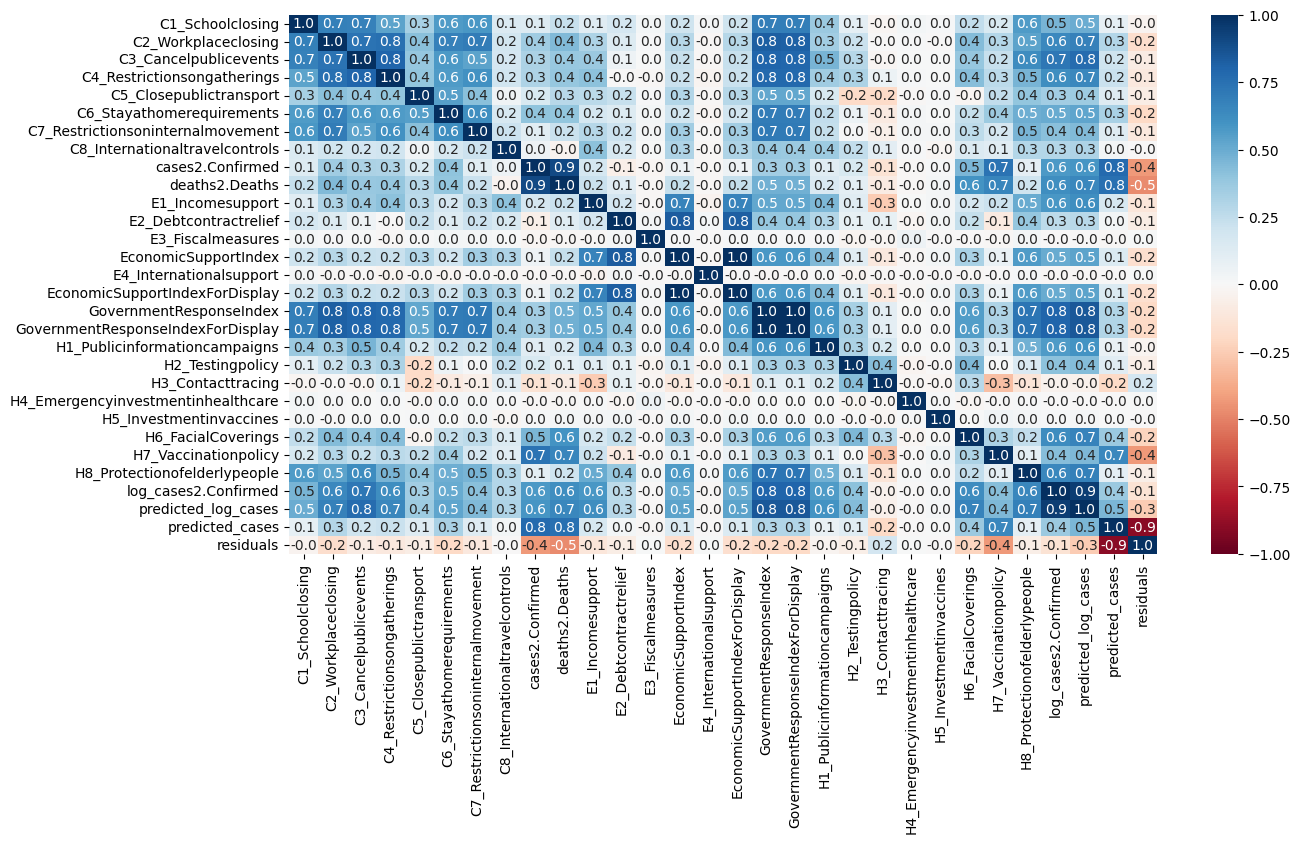

In [ ]:
#heatmap of correlation matrix
#we're looking for high positive and negative correlations to gauge policy significance
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat, annot=True, fmt=".1f",vmin=-1,vmax=1, cmap='RdBu');

In [ ]:
# Transform the dependent variable
df2['log_cases2.Confirmed'] = np.log(df2['cases2.Confirmed'])

# Independent variables
X = df2[['C1_Schoolclosing', 'C2_Workplaceclosing', 'C3_Cancelpublicevents',
       'C4_Restrictionsongatherings', 'C5_Closepublictransport',
       'C6_Stayathomerequirements', 'C7_Restrictionsoninternalmovement',
       'C8_Internationaltravelcontrols','deaths2.Deaths',
       'E1_Incomesupport', 'E2_Debtcontractrelief', 'E3_Fiscalmeasures',
       'EconomicSupportIndex', 'E4_Internationalsupport',
       'H1_Publicinformationcampaigns',
       'H2_Testingpolicy', 'H3_Contacttracing',
       'H4_Emergencyinvestmentinhealthcare', 'H5_Investmentinvaccines',
       'H6_FacialCoverings', 'H7_Vaccinationpolicy',
       'H8_Protectionofelderlypeople']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Dependent variable
y = df2['log_cases2.Confirmed']

# Fit the regression model
model = sm.OLS(y, X)
resutlts = model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     log_cases2.Confirmed   R-squared:                       0.895
Model:                              OLS   Adj. R-squared:                  0.894
Method:                   Least Squares   F-statistic:                     1423.
Date:                  Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                          06:29:27   Log-Likelihood:                -6544.8
No. Observations:                  4210   AIC:                         1.314e+04
Df Residuals:                      4184   BIC:                         1.331e+04
Df Model:                            25                                         
Covariance Type:              nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [ ]:
df2['predicted_log_cases'] = results.predict(X)
df2['predicted_cases'] = np.exp(df2['predicted_log_cases'])


ValueError: shapes (4210,23) and (26,) not aligned: 23 (dim 1) != 26 (dim 0)

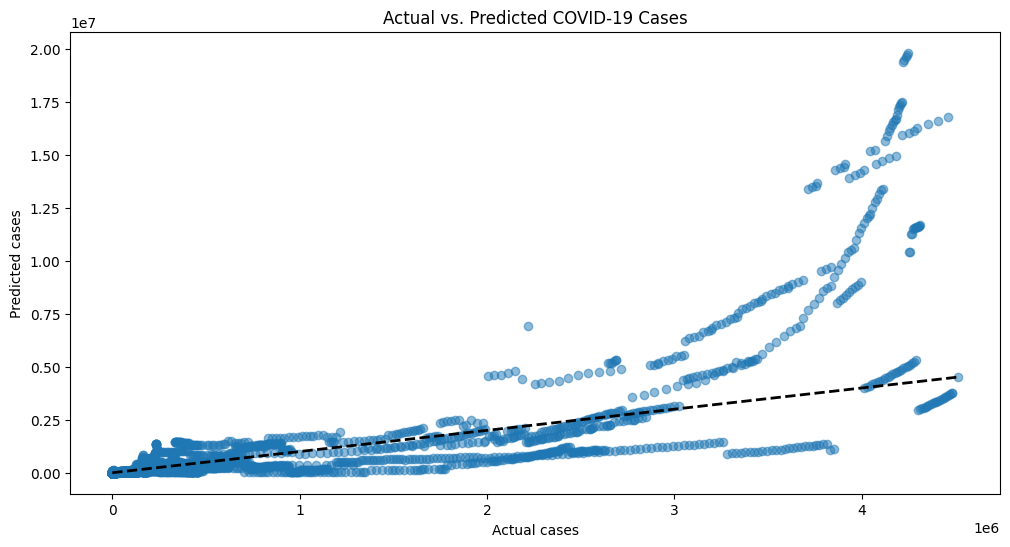

In [ ]:
#graphing actual vs predicted
plt.figure(figsize=(12, 6))
plt.scatter(df2['cases2.Confirmed'], df2['predicted_cases'], alpha=0.5)
plt.plot([df2['cases2.Confirmed'].min(), df2['cases2.Confirmed'].max()], [df2['cases2.Confirmed'].min(), df2['cases2.Confirmed'].max()], 'k--', lw=2)
plt.title('Actual vs. Predicted COVID-19 Cases')
plt.xlabel('Actual cases')
plt.ylabel('Predicted cases')
plt.show()

#this plot is not doing a very good job predicting the actual cases
#maybe caused due to the exponential nature of the pandemic


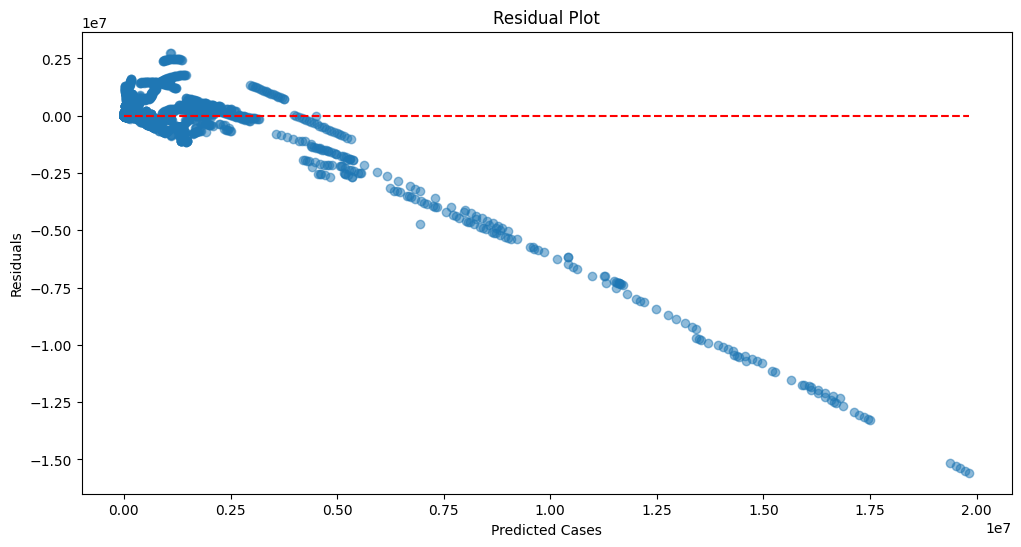

In [ ]:
#residual plot
#show's us that the predicted line show follow a more exponential form rather than linear
df2['residuals'] = df2['cases2.Confirmed'] - df2['predicted_cases']

plt.figure(figsize=(12, 6))
plt.scatter(df2['predicted_cases'], df2['residuals'], alpha=0.5)
plt.hlines(y=0, xmin=df2['predicted_cases'].min(), xmax=df2['predicted_cases'].max(), colors='red', linestyles='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Cases')
plt.ylabel('Residuals')
plt.show()


Instead of a straight line, using a smoothing technique like LOESS (Locally Estimated Scatterplot Smoothing) might provide a better visual fit for complex data distributions.

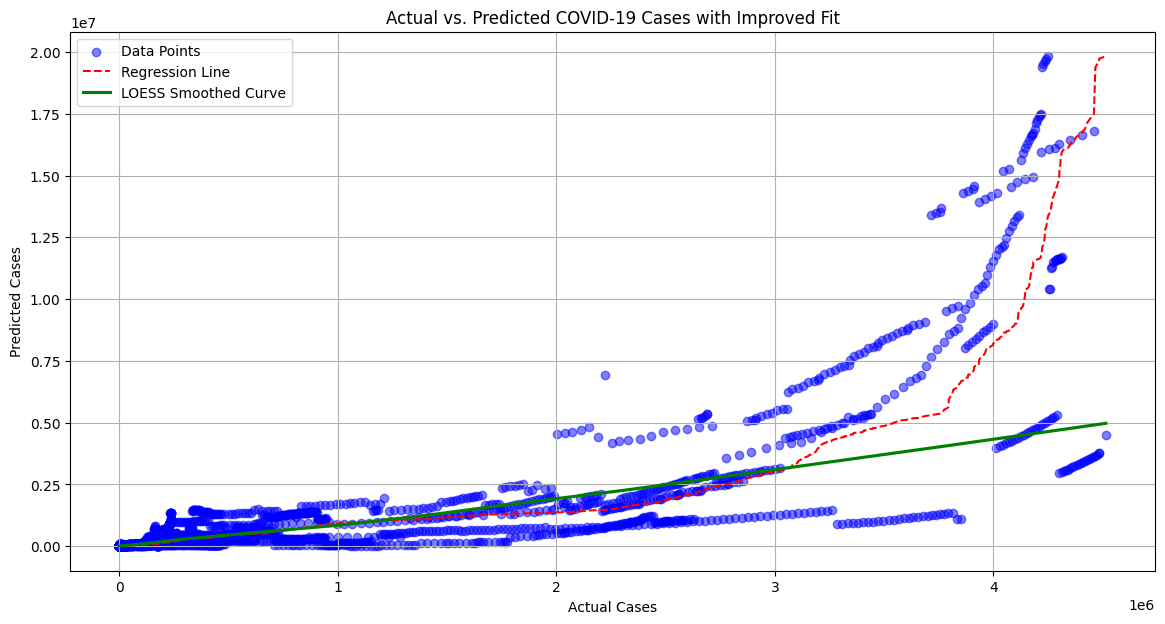

In [ ]:
#TO combat this, we are now:
#Creating a plot with LOESS smooth line
# Create the plot
plt.figure(figsize=(14, 7))
plt.scatter(df2['cases2.Confirmed'], df2['predicted_cases'], alpha=0.5, color='blue', label='Data Points')
plt.plot(np.sort(df2['cases2.Confirmed']), np.sort(df2['predicted_cases']), color='red', linestyle='--', label='Regression Line')

# Adding a LOESS smoothed line
sns.regplot(x='cases2.Confirmed', y='predicted_cases', data=df2, scatter=False, lowess=True, color='green', label='LOESS Smoothed Curve')

plt.title('Actual vs. Predicted COVID-19 Cases with Improved Fit')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)
plt.show()
#this does a way better job at predicted cases because the regression line familiarizes itself with local points close to it

The curvy nature of the LOESS line on our plot suggests that the relationship between the actual and predicted COVID-19 cases varies across the range of the data, indicating that different levels or scales of case counts may be influenced by different factors or exhibit different dynamics

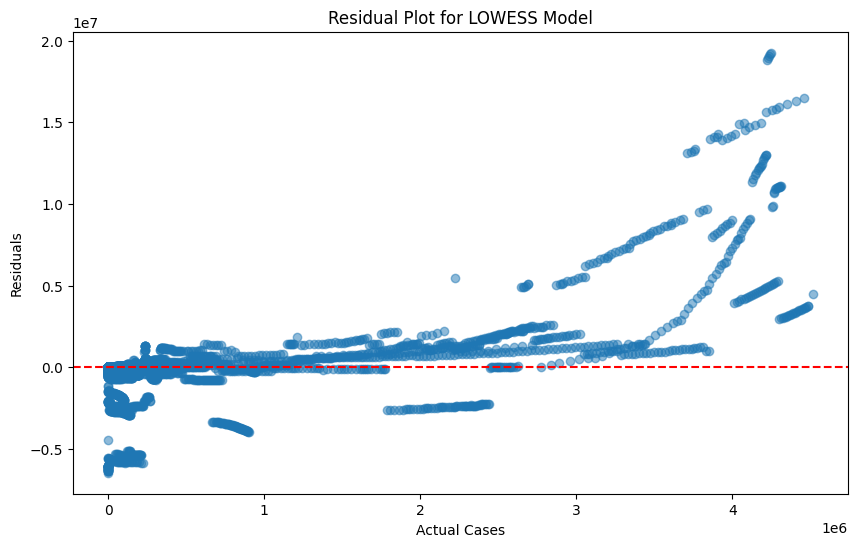

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

frac = 0.3

# Applying LOWESS to get the smoothed predicted values
lowess_results = lowess(df2['predicted_cases'], df2['cases2.Confirmed'], frac=frac)

# Creating a DataFrame from the LOWESS results
#for easier manipulation
lowess_df = pd.DataFrame(lowess_results, columns=['Actual Cases', 'LOWESS Predicted Cases'])

# Sorting by Actual Cases to align with the original data
lowess_df.sort_values('Actual Cases', inplace=True)

# Calculate residuals
df2_sorted = df2.sort_values('cases2.Confirmed')
df2_sorted['Residuals'] = df2_sorted['predicted_cases'] - lowess_df['LOWESS Predicted Cases']

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df2_sorted['cases2.Confirmed'], df2_sorted['Residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0 for reference
plt.title('Residual Plot for LOWESS Model')
plt.xlabel('Actual Cases')
plt.ylabel('Residuals')
plt.show()

#The residual plot does a much better job than the previous one